In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

/Users/sachinshinde/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline

## Data Import

In [3]:
data_df = pd.read_csv('/Users/sachinshinde/Desktop/Everything/Docs/Study/PurePython/titanic.csv')

In [4]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Summary Statistics

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# There are 891 records with all the columns having data except Cabin.
# The Age variable has some data missing

In [7]:
# Lets first analyze the target variable

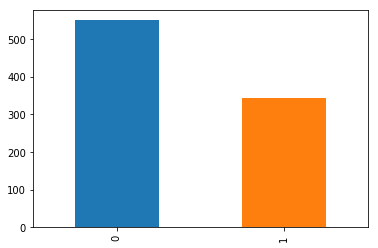

In [8]:
plt = pd.value_counts(data_df['Survived']).plot.bar()

In [9]:
# There is good distribution of 0s and 1s in the target dataset

## Slice and Dice

In [10]:
# We have some of the Id fields and Name columns. We will drop those columns 
# PassengerId, PassengerId, Cabin, Ticket

In [11]:
data_df = data_df.drop(['PassengerId','Name','Ticket','Cabin'], 1)
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
# This is dataset we will work on for the next steps 

# Preprocessing

In [13]:
# check missing values
data_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
# There are 177 missing values in Age
# For survival we need to have Age values
# Need to do the missing value imputation on Age

In [15]:
# For the age value calculation, we have an assumption
# The Class of the passanger is proportional to Avg. Age.
# If Pclass is 1 the passanger can be older than one who is having Pclass = 2 or 3

## Missing Values imputation for Age

In [16]:
age_df_class_1 = data_df.loc[data_df['Pclass'] == 1]
avg_age_pclass1 = np.mean(age_df_class_1['Age'])
avg_age_pclass1

38.233440860215055

In [17]:
age_df_class_2 = data_df.loc[data_df['Pclass'] == 2]
avg_age_pclass2 = np.mean(age_df_class_2['Age'])
avg_age_pclass2

29.87763005780347

In [18]:
age_df_class_3 = data_df.loc[data_df['Pclass'] == 3]
avg_age_pclass3 = np.mean(age_df_class_3['Age'])
avg_age_pclass3

25.14061971830986

In [19]:
# We can conclude that the Age depends on Pclass, 
# we will use this information to impute the missing values

In [20]:
for index, row in data_df.iterrows():
    if (np.isnan(row['Age']) and row['Pclass'] == 1):
        data_df.at[index,'Age'] = 38
    elif (np.isnan(row['Age']) and row['Pclass'] == 2):
        data_df.at[index,'Age'] = 30
    elif (np.isnan(row['Age']) and row['Pclass'] == 3):
        data_df.at[index,'Age'] = 25

In [21]:
data_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [22]:
# No more missing values for Age
# We can drop the records with 2 missing values in variale Embarked

In [23]:
data_df.dropna(inplace=True)

In [24]:
data_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
# No More Missing Values

## Column: Change from Categorical to Numerical

In [26]:
data_df['Sex'].replace('female', 0 , inplace = True)

In [27]:
data_df['Sex'].replace('male', 1 , inplace = True)

In [28]:
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [29]:
data_df['Embarked'].head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [30]:
# Embarked varible has more than two categories.
# we will need to encode this variable in o and 1 by gerenrating few more 
# variables
# we can use get_dummies which automatically figues out how to solve it
embark_dummy = pd.get_dummies(data_df['Embarked'],drop_first=True)
embark_dummy.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
data_df.drop(['Embarked'], axis =1 , inplace = True)
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [32]:
# Now we will need to add the two columns from embark_dummy dataframe
# We can use concat
data_df = pd.concat([data_df,embark_dummy],axis=1)
data_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


## Assumptions testing

In [33]:
# Check for colinearity to see if the tow variales are independent

In [34]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e9b5410>,
      dtype=object)

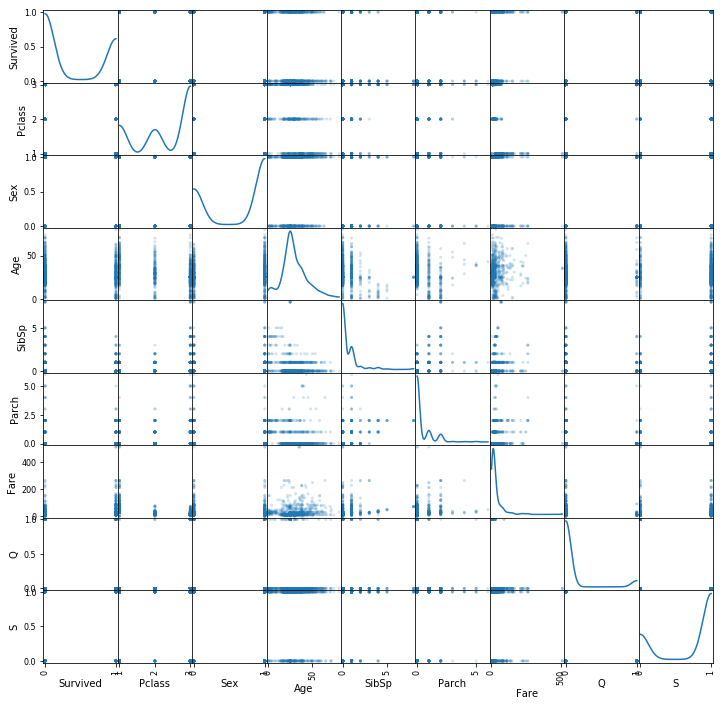

In [35]:
scatter_matrix(data_df, alpha = 0.2, figsize = (12, 12), diagonal = 'kde')

### We can see that Pclass now has very little influence on Survived function

In [36]:
# we need to statistically reject the column
corr = data_df.corr()
corr.style.background_gradient()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
Survived,1,-0.335549,-0.541585,-0.0549345,-0.03404,0.0831508,0.25529,0.00453573,-0.151777
Pclass,-0.335549,1,0.127741,-0.401322,0.0816556,0.0168245,-0.548193,0.220558,0.0764664
Sex,-0.541585,0.127741,1,0.0855636,-0.116348,-0.247508,-0.179958,-0.0752167,0.121405
Age,-0.0549345,-0.401322,0.0855636,1,-0.242834,-0.17428,0.118205,-0.0708466,0.00632534
SibSp,-0.03404,0.0816556,-0.116348,-0.242834,1,0.414542,0.160887,-0.0266917,0.0694383
Parch,0.0831508,0.0168245,-0.247508,-0.17428,0.414542,1,0.217532,-0.0815851,0.0615116
Fare,0.25529,-0.548193,-0.179958,0.118205,0.160887,0.217532,1,-0.116684,-0.163758
Q,0.00453573,0.220558,-0.0752167,-0.0708466,-0.0266917,-0.0815851,-0.116684,1,-0.499261
S,-0.151777,0.0764664,0.121405,0.00632534,0.0694383,0.0615116,-0.163758,-0.499261,1


In [37]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(5), uint8(2)
memory usage: 57.3 KB


## Test Train split and Model building

In [38]:
X = data_df[data_df.columns[1:8]]
y = data_df[data_df.columns[0]]

In [39]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [40]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)


# Logistic Regression Model

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[137,  27],
       [ 34,  69]])

## The result of confusion matrix is looking good. 

In [46]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.84      0.82       164
          1       0.72      0.67      0.69       103

avg / total       0.77      0.77      0.77       267



## The precision of the model is 0.80 

## Accuracy = (Number of elements correctly classified)/(Total elements)

Accuracy (ACC) = (Σ True positive + Σ True negative)/Σ Total population

In [59]:
Accuracy = (137.0+69.0) / (137.0+69+27+34.0)

In [60]:
Accuracy

0.7715355805243446

# Hence the logistic regression mode has accuracy of 0.7715355805243446